# Imports

In [3]:
#imports the package, contains also the tools to plot
import numpy as np
import matplotlib.pyplot as plt
import package_DBR
from package_DBR import Process, Bode, SelectPath_RT, FOPDT, SOPDT, Delay_RT, FO_RT

import package_LAB
from importlib import reload
package_LAB = reload(package_LAB)
from package_LAB import SelectPath_RT, Delay_RT, LEAD_LAG_RT, PID_RT, Bode_TF, Process

e = 2.71828

# Graphical parameters

In [4]:
#set variables initial values a, Kp, Tu, Tg, T1, T2
exp_a = 0.2
exp_Kp = 0.54
exp_Tu = 8.47
exp_Tg = 135.6
exp_T1 = 50.85
exp_T2 = 73.45

# Plot of the 5 models

(0.0, 1200.0)

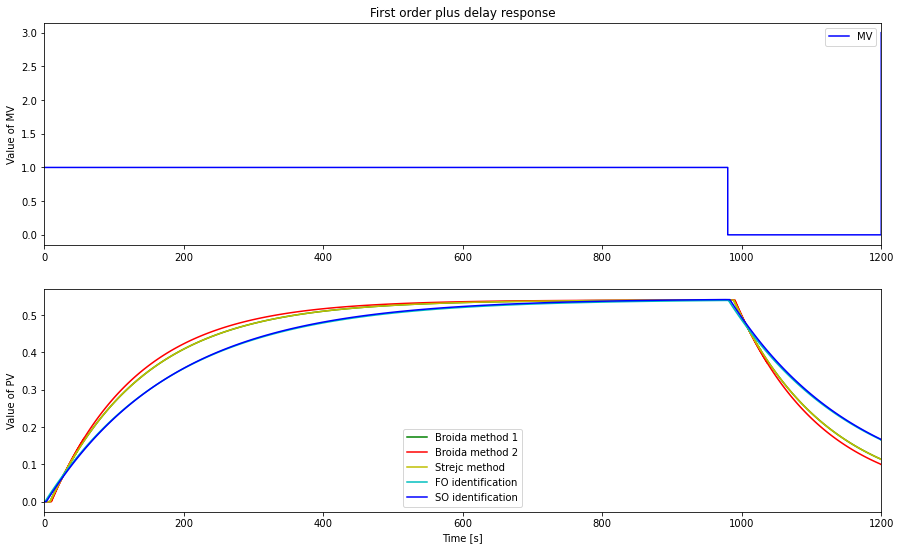

In [5]:
#FO Broida method 1 exp
TSim = 1200
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 1, 980: 0, TSim: 3}

t = []
MV = []

# Parameters for broida method 1
Kp_bro1 = exp_Kp
T_bro1 = exp_Tg
theta_bro1 = exp_Tu

#parameters for broida method 2
Kp_bro2 = exp_Kp
T_bro2 = 5.5 * (exp_T2 - exp_T1)
theta_bro2 = 2.8 * exp_T1 - 1.8 * exp_T2

# Parameters for Strejc
Kp_str = exp_Kp
T_str = exp_Tg / 1
theta_str = exp_Tu

#FOPDT identification
Kp_FO = 0.5415158186540473
T_FO = 185.24148313355732
theta_FO = 1.036225593949111

#SOPDT identification
Kp_SO = 0.5438749526909622
T1_SO = 184.2423025000344
T2_SO = 6.478747375951926e-05
theta_SO = 2.9999487500471216


# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV_bro1 = FOPDT(MV,Kp_bro1,T_bro1,theta_bro1,Ts)
PV_bro2 = FOPDT(MV,Kp_bro2,T_bro2,theta_bro2,Ts)
PV_str = FOPDT(MV,Kp_str,T_str,theta_str,Ts)
PV_FO = FOPDT(MV,Kp_FO,T_FO,theta_FO,Ts)
PV_SO = SOPDT(MV,Kp_SO,T1_SO,T2_SO,theta_SO,Ts)



plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_bro1,'g-',label='Broida method 1',where='post')
plt.step(t,PV_bro2,'r-',label='Broida method 2',where='post')
plt.step(t,PV_str,'y-',label='Strejc method',where='post')
plt.step(t,PV_FO,'c-',label='FO identification',where='post')
plt.step(t,PV_SO,'b-',label='SO identification',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# Bode diagrams of the 5 models

In [15]:
Broida1 = Process({}) # Default process = unit gain
Broida2 = Process({})
Strejc = Process({})
FOID = Process({})
SOID = Process({})


# Parameters for input-output dynamics P(s)
Broida1.parameters['Kp'] = 0.63
Broida1.parameters['Tlag1'] = 135.6
Broida1.parameters['theta'] = 8.47

Broida2.parameters['Kp'] = 0.63
Broida2.parameters['Tlag1'] = 124.3
Broida2.parameters['theta'] = 10.2

Strejc.parameters['Kp'] = 0.54
Strejc.parameters['Tlag1'] = 135.6
Strejc.parameters['theta'] = 8.47

FOID.parameters['Kp'] = 0.5415158186540473
FOID.parameters['Tlag1'] = 185.24148313355732
FOID.parameters['theta'] = 1.036225593949111

SOID.parameters['Kp'] = 0.5438749526909622
SOID.parameters['Tlag1'] = 184.2423025000344
SOID.parameters['Tlag2'] = 6.478747375951926e-05
SOID.parameters['theta'] = 2.9999487500471216

omega = np.logspace(-4, 1, 10000)

bro1 = Bode_TF(Broida1,omega)
bro2 = Bode_TF(Broida2, omega)
stre = Bode_TF(Strejc, omega)
fo = Bode_TF(FOID, omega)
so = Bode_TF(SOID, omega)

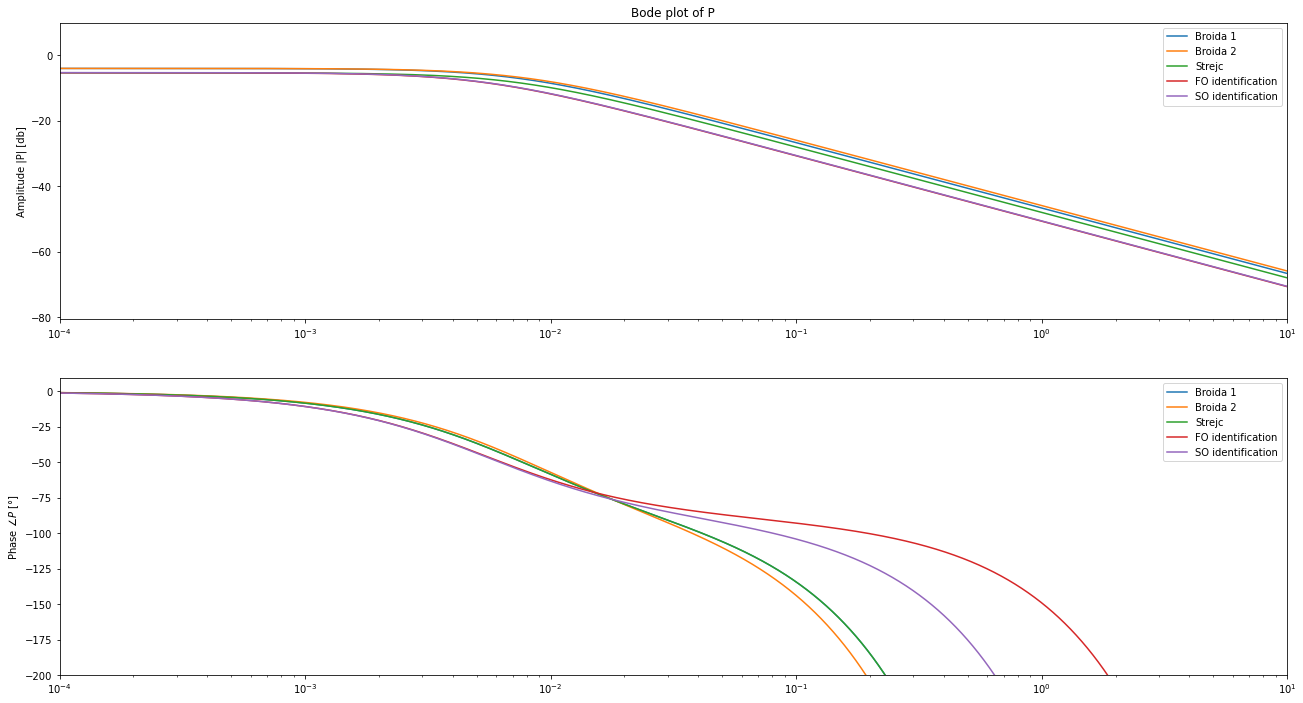

In [16]:
fig, (ax_gain, ax_phase) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)


ax_gain.semilogx(omega,20*np.log10(np.abs(bro1)),label='Broida 1')
ax_gain.semilogx(omega,20*np.log10(np.abs(bro2)),label='Broida 2')
ax_gain.semilogx(omega,20*np.log10(np.abs(stre)),label='Strejc')
ax_gain.semilogx(omega,20*np.log10(np.abs(fo)),label='FO identification')
ax_gain.semilogx(omega,20*np.log10(np.abs(so)),label='SO identification')



gain_min = np.min(20*np.log10(np.abs(bro1)/5))
gain_max = np.max(20*np.log10(np.abs(bro1)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude |P| [db]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')

ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(bro1)),label='Broida 1')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(bro2)),label='Broida 2')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(stre)),label='Strejc')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(fo)),label='FO identification')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(so)),label='SO identification')



ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(bro1))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(bro1))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_ylabel(r'Phase $\angle P$ [°]')
ax_phase.legend(loc='best')